## Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from sklearn import linear_model, datasets
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import graphviz
%matplotlib inline

## Output class dictionary

In [11]:
class_label = {
                1:'WALKING',
                2:'WALKING_UPSTAIRS',
                3:'WALKING_DOWNSTAIRS',
                4:'SITTING',
                5:'STANDING',
                6:'LAYING'
              };

## Loading Dataset (Training)

In [12]:
# Read the Feature Info
feature_info_file_name = "../dataset/features.txt";
feature_info_file = open(feature_info_file_name,'r');
feature_name = feature_info_file.read().splitlines();
print 'Number of Features : {}\n'.format(len(feature_name));

# Read the Training data
df_X_train = pd.read_csv('../dataset/train/X_train.txt',names=feature_name,header=None,delim_whitespace=True);
df_X_test  = pd.read_csv('../dataset/test/X_test.txt',names=feature_name,header=None,delim_whitespace=True);

# Read training outputs
df_y_train = pd.read_csv('../dataset/train/y_train.txt',names=['activity'],header=None);
df_y_test = pd.read_csv('../dataset/test/y_test.txt',names=['activity'],header=None);

Number of Features : 561



In [13]:
df_X_train.head()

tBodyAcc_mean_X  tBodyAcc_mean_Y  tBodyAcc_mean_Z  tBodyAcc_std_X  \
0         0.288585        -0.020294        -0.132905       -0.995279   
1         0.278419        -0.016411        -0.123520       -0.998245   
2         0.279653        -0.019467        -0.113462       -0.995380   
3         0.279174        -0.026201        -0.123283       -0.996091   
4         0.276629        -0.016570        -0.115362       -0.998139   

   tBodyAcc_std_Y  tBodyAcc_std_Z  tBodyAcc_mad_X  tBodyAcc_mad_Y  \
0       -0.983111       -0.913526       -0.995112       -0.983185   
1       -0.975300       -0.960322       -0.998807       -0.974914   
2       -0.967187       -0.978944       -0.996520       -0.963668   
3       -0.983403       -0.990675       -0.997099       -0.982750   
4       -0.980817       -0.990482       -0.998321       -0.979672   

   tBodyAcc_mad_Z  tBodyAcc_max_X         ...           \
0       -0.923527       -0.934724         ...            
1       -0.957686       -0.943068         ...            
2       -0.977469       -0.938692         ...            
3       -0.989302       -0.938692         ...            
4       -0.990441       -0.942469         ...            

   fBodyBodyGyroJerkMag_meanFreq  fBodyBodyGyroJerkMag_skewness  \
0                      -0.074323                      -0.298676   
1                       0.158075                      -0.595051   
2                       0.414503                      -0.390748   
3                       0.404573                      -0.117290   
4                       0.087753                      -0.351471   

   fBodyBodyGyroJerkMag_kurtosis  angle_tBodyAccMean_gravity_  \
0                      -0.710304                    -0.112754   
1                      -0.861499                     0.053477   
2                      -0.760104                    -0.118559   
3                      -0.482845                    -0.036788   
4                      -0.699205                     0.123320   

   angle_tBodyAccJerkMean_gravityMean  angle_tBodyGyroMean_gravityMean  \
0                            0.030400                        -0.464761   
1                           -0.007435                        -0.732626   
2                            0.177899                         0.100699   
3                           -0.012892                         0.640011   
4                            0.122542                         0.693578   

   angle_tBodyGyroJerkMean_gravityMean  angle_X_gravityMean  \
0                            -0.018446            -0.841247   
1                             0.703511            -0.844788   
2                             0.808529            -0.848933   
3                            -0.485366            -0.848649   
4                            -0.615971            -0.847865   

   angle_Y_gravityMean  angle_Z_gravityMean  
0             0.179941            -0.058627  
1             0.180289            -0.054317  
2             0.180637            -0.049118  
3             0.181935            -0.047663  
4             0.185151            -0.043892  

[5 rows x 561 columns]

## Random Forest
- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [46]:
# Extract training features and outputs
X_train = df_X_train.values;
y_train = df_y_train.activity;
X_test = df_X_test.values;
y_test = df_y_test.activity;

In [67]:
# Fit Random Forest model
#clf = RandomForestClassifier(n_estimators=500,min_samples_split=20,min_samples_leaf=20);
clf = RandomForestClassifier(n_estimators=100);
clf = clf.fit(X_train, y_train);

In [68]:
# Predict the output
y_hat_train = clf.predict(X_train);
y_hat_test  = clf.predict(X_test);

In [69]:
# Measure model performance
accuracy_train = 100*np.mean(y_hat_train==y_train);
accuracy_test = 100*np.mean(y_hat_test==y_test);
print ('Training Accuracy is {} %'.format(accuracy_train));
print ('Testing Accuracy is {} %'.format(accuracy_test));

Training Accuracy is 100.0 %
Testing Accuracy is 26.4675941636 %


## Random Forest (ntree sweep)

In [60]:
accuracy_train_list = list();
accuracy_test_list = list();
ntree_array = np.arange(10,210,10);

for n in ntree_array:
    
    print('Performing Random Forest for n_tree : {}'.format(n));
    
    # Fit Random Forest Model
    clf = RandomForestClassifier(n_estimators=n);
    clf = clf.fit(X_train,y_train);
    
    # Predict the output
    y_hat_train = clf.predict(X_train);
    y_hat_test = clf.predict(X_test);
    
    # Measure the performance
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test = 100*np.mean(y_hat_test==y_test);
    accuracy_train_list.append(accuracy_train);
    accuracy_test_list.append(accuracy_test);


Performing Random Forest for n_tree : 10
Performing Random Forest for n_tree : 20
Performing Random Forest for n_tree : 30
Performing Random Forest for n_tree : 40
Performing Random Forest for n_tree : 50
Performing Random Forest for n_tree : 60
Performing Random Forest for n_tree : 70
Performing Random Forest for n_tree : 80
Performing Random Forest for n_tree : 90
Performing Random Forest for n_tree : 100
Performing Random Forest for n_tree : 110
Performing Random Forest for n_tree : 120
Performing Random Forest for n_tree : 130
Performing Random Forest for n_tree : 140
Performing Random Forest for n_tree : 150
Performing Random Forest for n_tree : 160
Performing Random Forest for n_tree : 170
Performing Random Forest for n_tree : 180
Performing Random Forest for n_tree : 190
Performing Random Forest for n_tree : 200


## Decision Tree

## Fit Logistic regression model

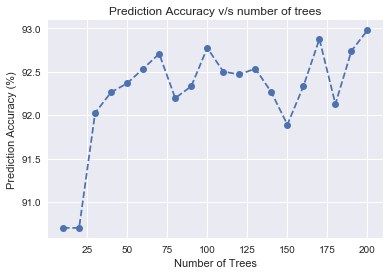

In [61]:
plt.figure(1);
#plt.plot(ntree_array,accuracy_train_list,'o--');
plt.plot(ntree_array,accuracy_test_list,'o--');
plt.xlabel('Number of Trees');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Prediction Accuracy v/s number of trees');
plt.show();

# Conclusion
- From the above plot it can be seen that best testing accuracy is obtained for L1 regularizer with lambda = 0.1
- As lambda increases training accuracy decreases , but testing accuracy first increases, reaches a maximum value and then decreases. This maximum value is what we are looking for. The motivation to perform lambda sweep was to find the optimum value of lambda which gives us the best accuracy on the testing data